In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos de la Varcua 
data = pd.read_excel('EAC_REP_VARCUA_2022.xlsx')

In [3]:
# primer vistazo de los datos

print(data.shape)
data.head()

(5012, 130)


,IDNOREMP,IDENT,CORRELA,IDOJ,ESCAPER,PYMES,PRIORIDAD,ESTADO,NOVEDAD,ESCAPRO,...,PANEL,ACTSENT,NH,IDAIO,IDNOMCOM,DIRBASE,ESTADO_ANALISIS,LOGISTICO,CIIU3,PROCESA
0,7358,NaN,466,14,3,2,1,5,99,NaN,...,0,4663,0,2011,GLOBAL TOOLS S.A.S,2014.0,NaN,NaN,NaN,NaN
1,7374,NaN,466,14,3,2,2,8,99,NaN,...,0,4664,0,2012,ANTIOQUE?A DE QUIMICOS SAS,2014.0,NaN,NaN,NaN,NaN
2,7376,NaN,462,14,1,1,2,8,99,NaN,...,0,4721,0,2012,AGROCOCOROLLO S.A.S.,2014.0,NaN,NaN,NaN,NaN
3,7385,NaN,472,14,3,2,1,5,99,NaN,...,0,4729,0,2012,SUPERMERCADO LA ESTACION / DEPOSITO CENTRAL,2014.0,NaN,NaN,NaN,NaN
4,7387,NaN,473,14,3,2,2,6,99,NaN,...,0,4731,0,2012,COMERCIALIZADORA INDUSTRIAL DE COMBUSTIBLES RI...,2014.0,NaN,NaN,NaN,NaN


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Columns: 130 entries, IDNOREMP to PROCESA
dtypes: float64(25), int64(102), object(3)
memory usage: 5.0+ MB
None


In [5]:
# Convertimos la variable categórica "CORRE" que contiene etiquetas "45", "46" y "47" en variables dummy
# Las variables dummy se nombrarán como 'DIV_CIIU_45', 'DIV_CIIU_46' y 'DIV_CIIU_47', representando las etiquetas únicas de 
# la columna 'DIV_CIIU'. Esto permitirá identificar qué etiquetas se aplican a cada fila en particular

dummy_div_ciiu = pd.get_dummies(data['CORRE'], prefix='DIV_CIIU') # Transformamos la variable categórica CORRE en dummy

data = pd.concat([data, dummy_div_ciiu], axis=1) # Concatenamos las nuevas variables dummy al conjunto de datos original


data.drop('CORRE', axis=1, inplace=True) # Eliminamos la columna original 'CORRE'

# Mostrar el nuevo conjunto de datos con variables dummy
print(data.shape)
data.head()

(5012, 132)


,IDNOREMP,IDENT,CORRELA,IDOJ,ESCAPER,PYMES,PRIORIDAD,ESTADO,NOVEDAD,ESCAPRO,...,IDAIO,IDNOMCOM,DIRBASE,ESTADO_ANALISIS,LOGISTICO,CIIU3,PROCESA,DIV_CIIU_45,DIV_CIIU_46,DIV_CIIU_47
0,7358,NaN,466,14,3,2,1,5,99,NaN,...,2011,GLOBAL TOOLS S.A.S,2014.0,NaN,NaN,NaN,NaN,False,True,False
1,7374,NaN,466,14,3,2,2,8,99,NaN,...,2012,ANTIOQUE?A DE QUIMICOS SAS,2014.0,NaN,NaN,NaN,NaN,False,True,False
2,7376,NaN,462,14,1,1,2,8,99,NaN,...,2012,AGROCOCOROLLO S.A.S.,2014.0,NaN,NaN,NaN,NaN,False,True,False
3,7385,NaN,472,14,3,2,1,5,99,NaN,...,2012,SUPERMERCADO LA ESTACION / DEPOSITO CENTRAL,2014.0,NaN,NaN,NaN,NaN,False,False,True
4,7387,NaN,473,14,3,2,2,6,99,NaN,...,2012,COMERCIALIZADORA INDUSTRIAL DE COMBUSTIBLES RI...,2014.0,NaN,NaN,NaN,NaN,False,False,True


In [6]:
# Visualizamos si se crearon las tres nuevas variables dummy
print(data[['DIV_CIIU_45', 'DIV_CIIU_46', 'DIV_CIIU_47']].head())


   DIV_CIIU_45  DIV_CIIU_46  DIV_CIIU_47
0        False         True        False
1        False         True        False
2        False         True        False
3        False        False         True
4        False        False         True


In [7]:
print(data.head())

   IDNOREMP  IDENT  CORRELA  IDOJ  ESCAPER  PYMES  PRIORIDAD  ESTADO  NOVEDAD  \
0      7358    NaN      466    14        3      2          1       5       99   
1      7374    NaN      466    14        3      2          2       8       99   
2      7376    NaN      462    14        1      1          2       8       99   
3      7385    NaN      472    14        3      2          1       5       99   
4      7387    NaN      473    14        3      2          2       6       99   

   ESCAPRO  ...  IDAIO                                           IDNOMCOM  \
0      NaN  ...   2011                                 GLOBAL TOOLS S.A.S   
1      NaN  ...   2012                         ANTIOQUE?A DE QUIMICOS SAS   
2      NaN  ...   2012                               AGROCOCOROLLO S.A.S.   
3      NaN  ...   2012        SUPERMERCADO LA ESTACION / DEPOSITO CENTRAL   
4      NaN  ...   2012  COMERCIALIZADORA INDUSTRIAL DE COMBUSTIBLES RI...   

   DIRBASE  ESTADO_ANALISIS  LOGISTICO  CIIU3  PRO

In [8]:
# Seleccionar el subconjunto específico de columnas
# Agregar variables dummy no conduce a la sobreespecificación del modelo, por lo tanto, se busca que la red neuronal capture
# las relaciones especificas entre cada categoría y la variable de respuesta, por lo tanto, la presencia de una de estas 
# variabes dummy puede influir en como la red neuronal aprende y generaliza patrones asociados en cada categoría. 
variables_principales = [
    'VENTA', 'CTO', 'BRUTA', 'CONSUI', 'AGREGA', 'TOTPERSO',
    'DIV_CIIU_45', 'DIV_CIIU_46', 'DIV_CIIU_47'
]

# Creamos un nuevo DataFrame con solo las columnas o varibales seleccionadas
variables_principales = data[variables_principales]

print(variables_principales.head())

      VENTA         CTO    BRUTA     CONSUI     AGREGA  TOTPERSO  DIV_CIIU_45  \
0   3729994   1694065.0  2035929   502199.0  1533730.0        21        False   
1  13398424   9933137.0  3465287  1049305.5  2415981.5        40        False   
2   2548284   2102311.0   445973   122788.0   323185.0         6        False   
3  19343838  16651191.0  2692647   928902.0  1763745.0        48        False   
4  23242297  19600714.0  3641583  1753403.0  1888180.0        28        False   

   DIV_CIIU_46  DIV_CIIU_47  
0         True        False  
1         True        False  
2         True        False  
3        False         True  
4        False         True  


In [9]:
# Obtenemos los tipos de datos de las variables en las columnas seleccionadas
tipos_de_variables = variables_principales.dtypes

print(tipos_de_variables)


VENTA            int64
CTO            float64
BRUTA            int64
CONSUI         float64
AGREGA         float64
TOTPERSO         int64
DIV_CIIU_45       bool
DIV_CIIU_46       bool
DIV_CIIU_47       bool
dtype: object


In [10]:
# Se eliminaran los espacios que tengan inconsistencias
# Seleccionar el subconjunto específico de columnas anteriormente creados

variables_principales = [
    'VENTA', 'CTO', 'BRUTA', 'CONSUI', 'AGREGA', 'TOTPERSO',
    'DIV_CIIU_45', 'DIV_CIIU_46', 'DIV_CIIU_47'
]

# Filtramos solo las columnas de tipo cadena
columnas_cadena = data[variables_principales].select_dtypes(include='object').columns

# Eliminamos los espacios en blanco y valores nulos o vacíos solo en las columnas de tipo cadena
data[columnas_cadena] = data[columnas_cadena].apply(lambda x: x.str.strip()).replace('', pd.NA).dropna()

print(data[variables_principales].head())

      VENTA         CTO    BRUTA     CONSUI     AGREGA  TOTPERSO  DIV_CIIU_45  \
0   3729994   1694065.0  2035929   502199.0  1533730.0        21        False   
1  13398424   9933137.0  3465287  1049305.5  2415981.5        40        False   
2   2548284   2102311.0   445973   122788.0   323185.0         6        False   
3  19343838  16651191.0  2692647   928902.0  1763745.0        48        False   
4  23242297  19600714.0  3641583  1753403.0  1888180.0        28        False   

   DIV_CIIU_46  DIV_CIIU_47  
0         True        False  
1         True        False  
2         True        False  
3        False         True  
4        False         True  


In [11]:
# Obtenemos los tipos de datos de las variables en las columnas seleccionadas después de la limpieza
variables_transformadas = data[variables_principales].dtypes

print(variables_transformadas)


VENTA            int64
CTO            float64
BRUTA            int64
CONSUI         float64
AGREGA         float64
TOTPERSO         int64
DIV_CIIU_45       bool
DIV_CIIU_46       bool
DIV_CIIU_47       bool
dtype: object


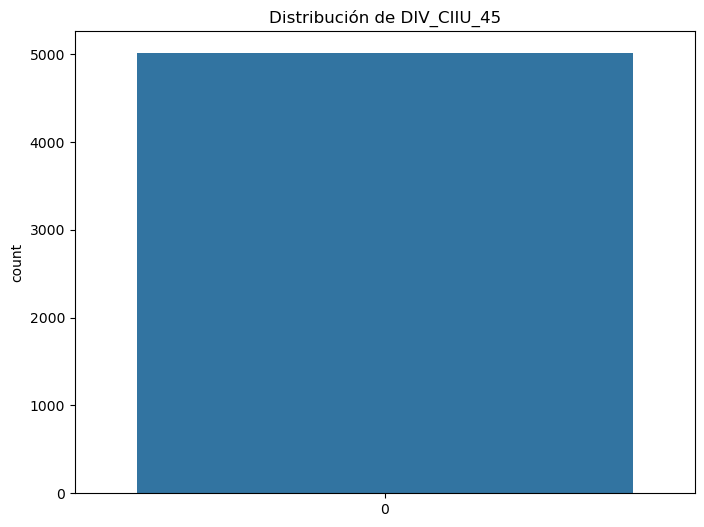

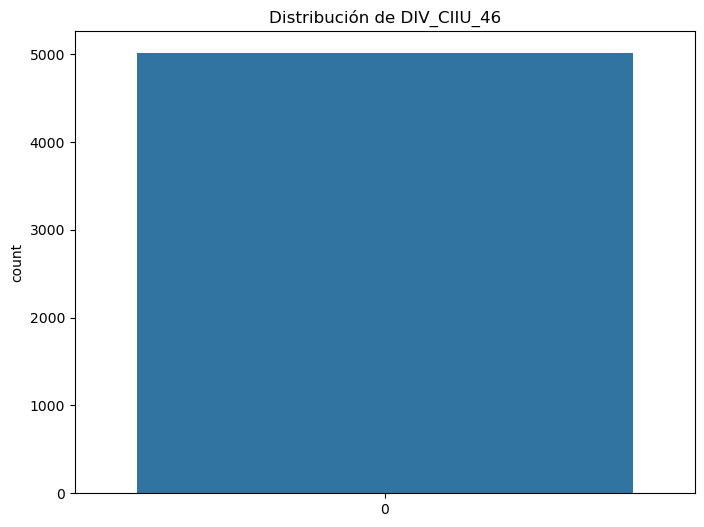

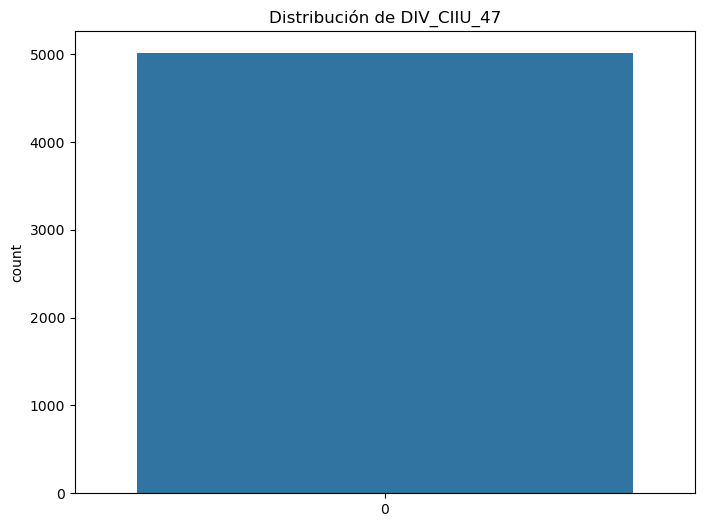

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


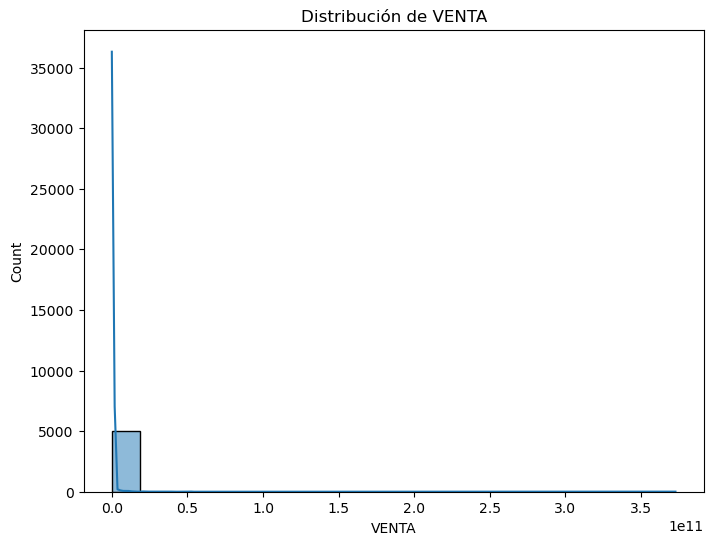

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


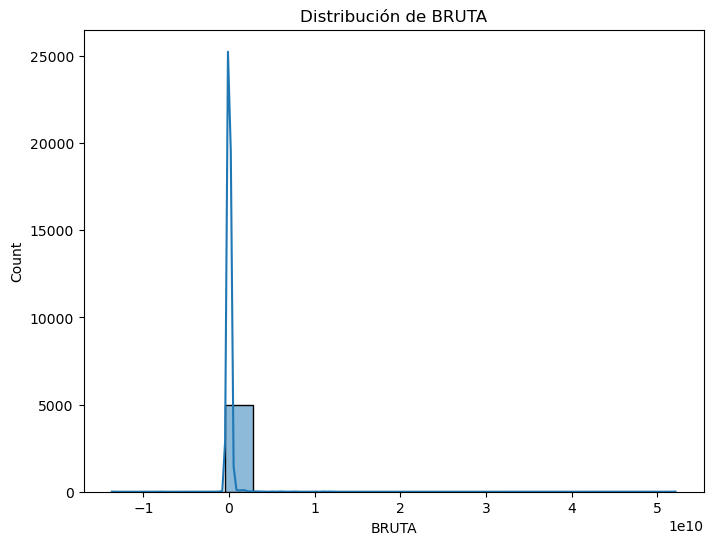

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


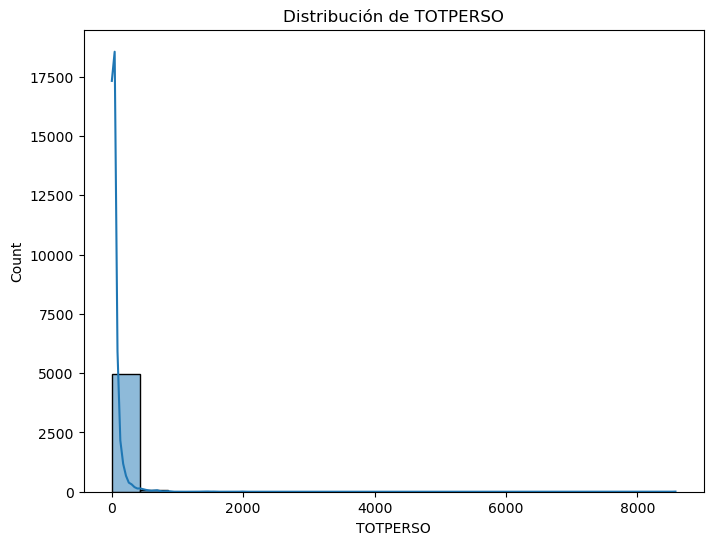

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


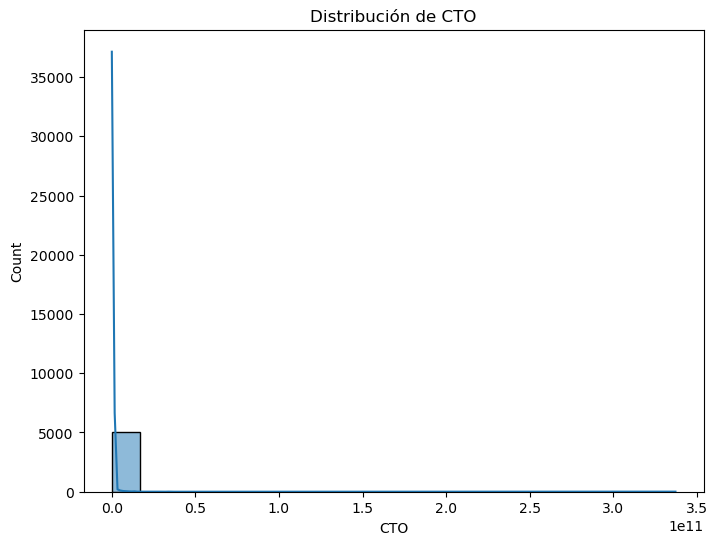

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


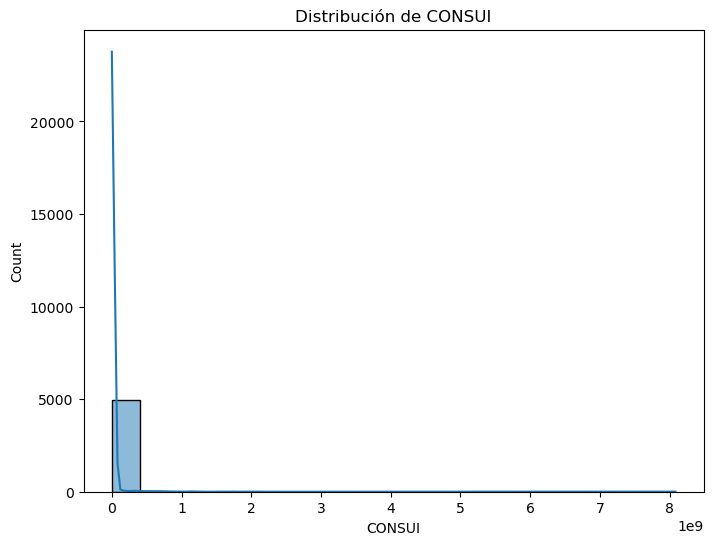

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


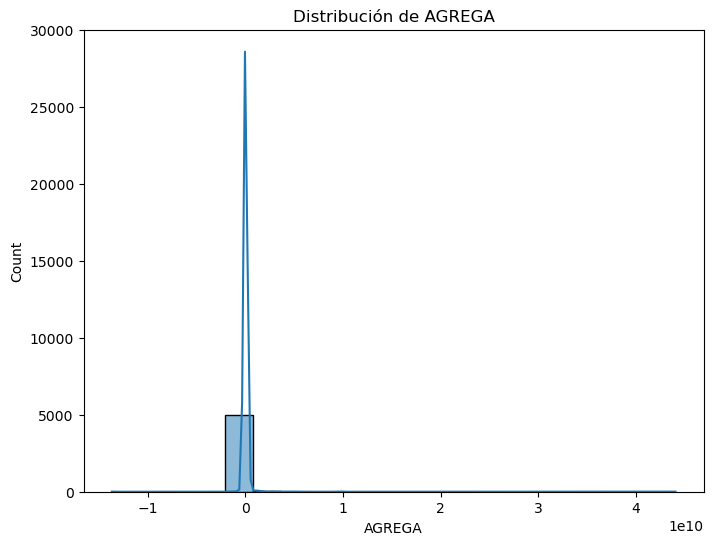

In [12]:
columnas_categoricas = data[variables_principales].select_dtypes(include='bool').columns # Filtramos variables categóricas, numéricas enteras y numéricas de punto flotante
columnas_enteras = data[variables_principales].select_dtypes(include='int64').columns
columnas_float = data[variables_principales].select_dtypes(include='float64').columns

for columna in columnas_categoricas:# Visualizar la distribución de variables categóricas 
    plt.figure(figsize=(8, 6))
    sns.countplot(data[columna])
    plt.title(f'Distribución de {columna}')
    plt.show()

for columna in columnas_enteras: # Visualizar la distribución de variables numéricas enteras
    plt.figure(figsize=(8, 6))
    sns.histplot(data[columna], bins=20, kde=True)
    plt.title(f'Distribución de {columna}')
    plt.show()

for columna in columnas_float: # Visualizar la distribución de variables numéricas de punto flotante
    plt.figure(figsize=(8, 6))
    sns.histplot(data[columna], bins=20, kde=True)
    plt.title(f'Distribución de {columna}')
    plt.show()


C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


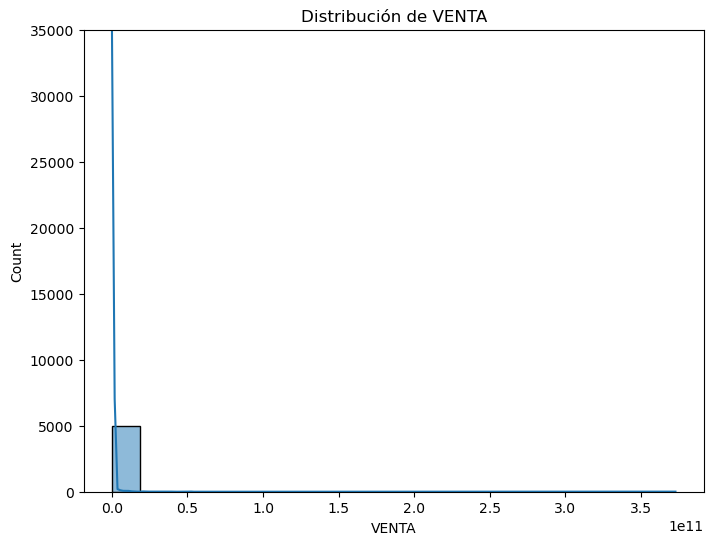

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


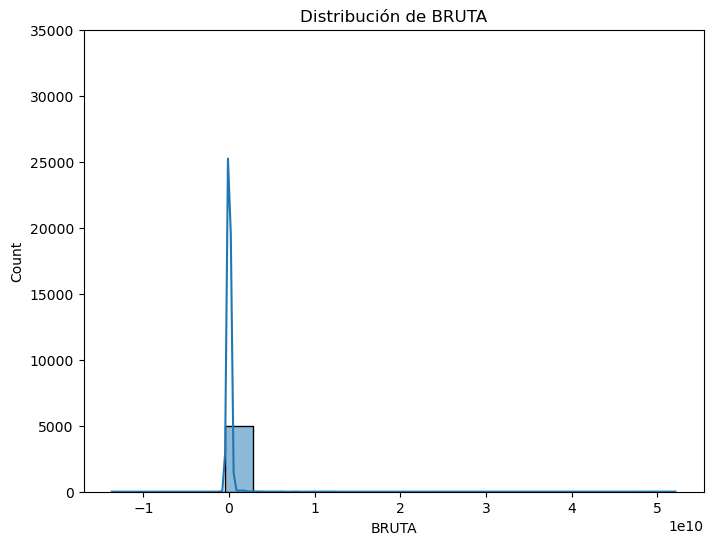

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


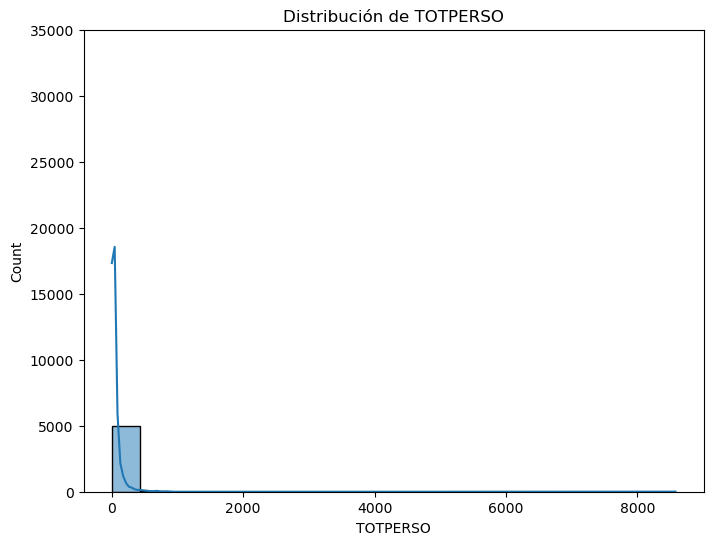

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


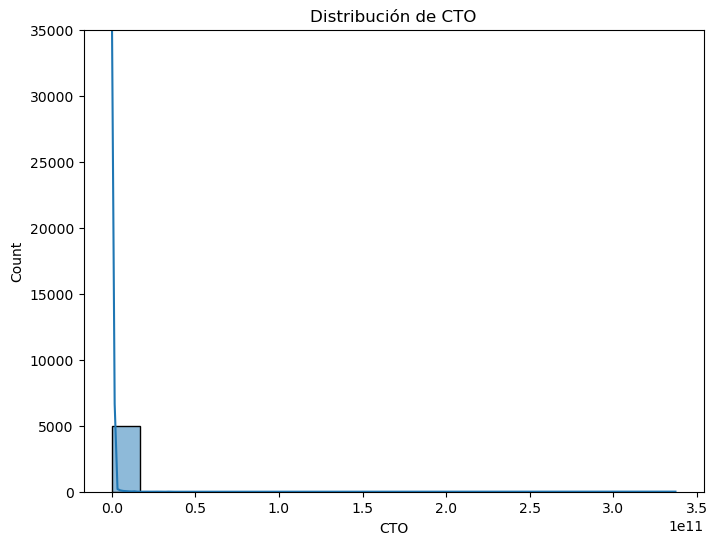

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


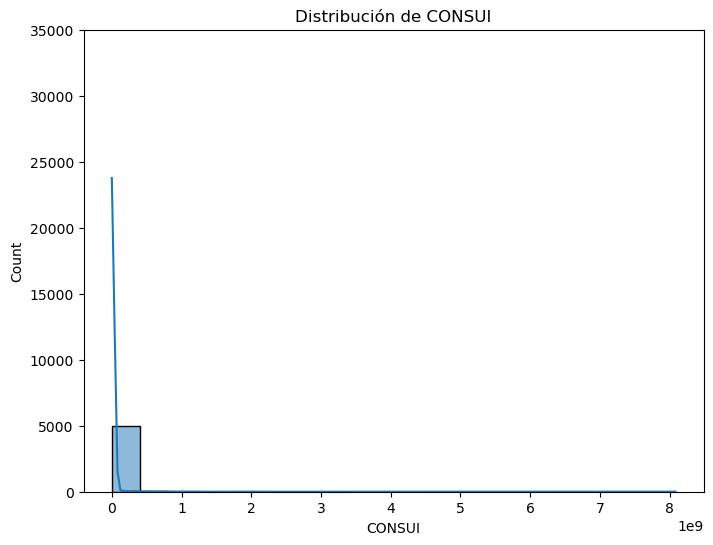

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


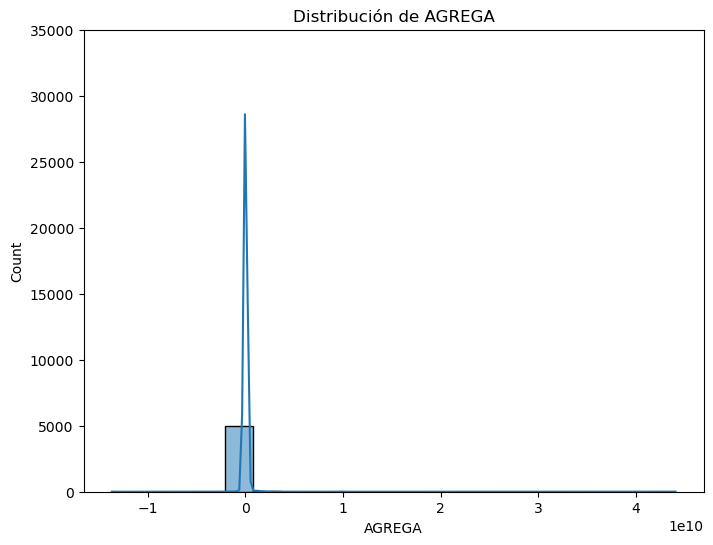

In [13]:
# Visualizar la distribución de variables numéricas enteras
for columna in columnas_enteras:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[columna], bins=20, kde=True)
    plt.title(f'Distribución de {columna}')
    plt.ylim(0, 35000)
    plt.show()

# Visualizar la distribución de variables numéricas de punto flotante
for columna in columnas_float:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[columna], bins=20, kde=True)
    plt.title(f'Distribución de {columna}')
    plt.ylim(0, 35000)
    plt.show()

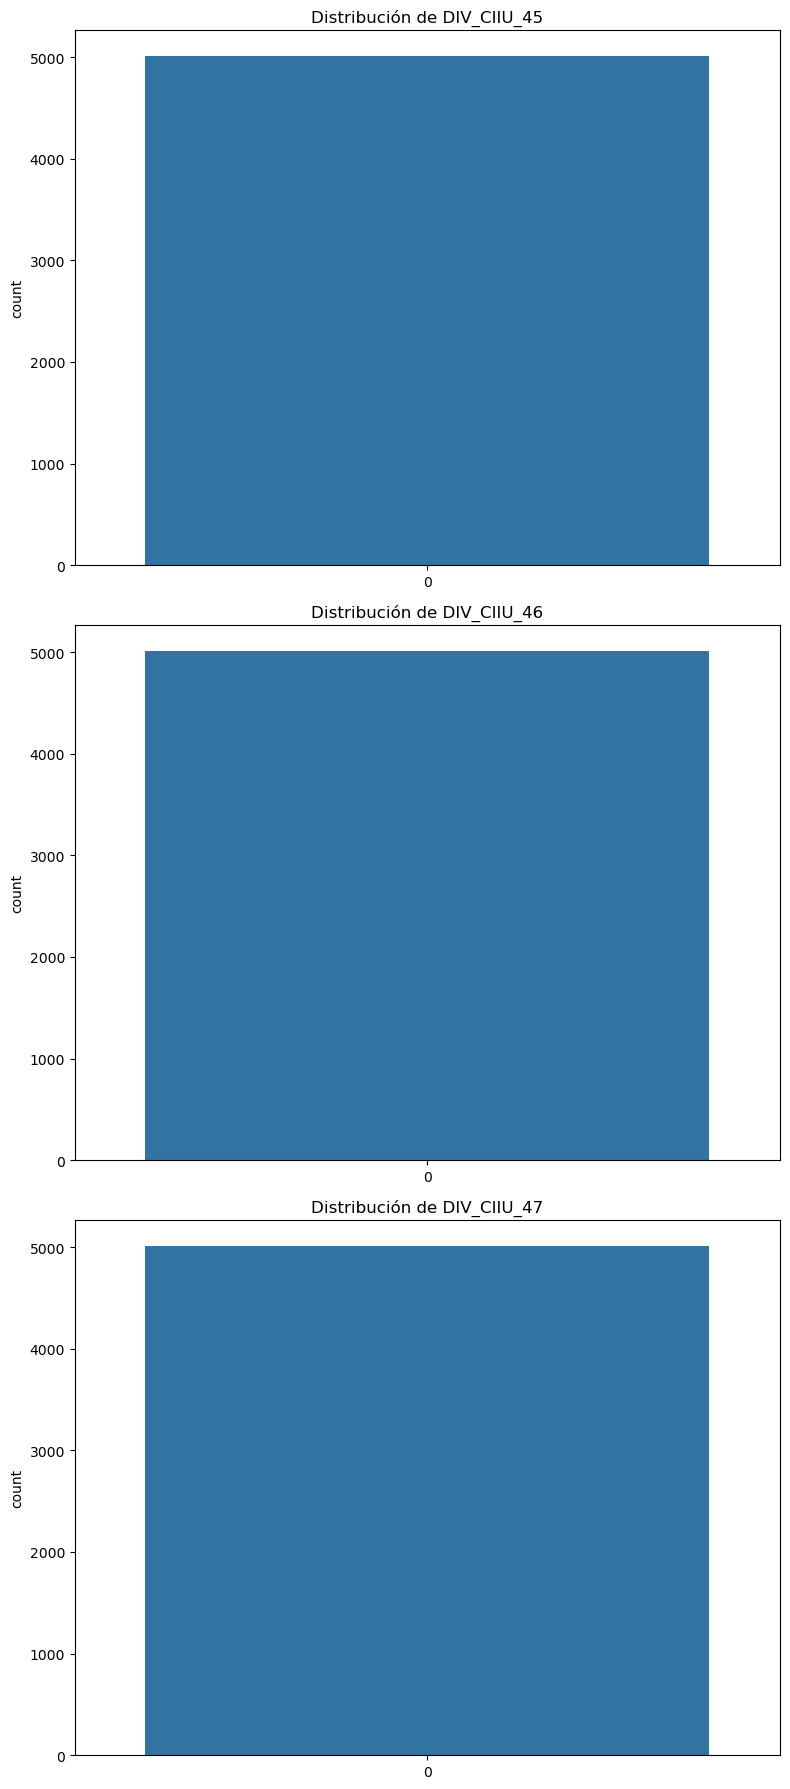

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


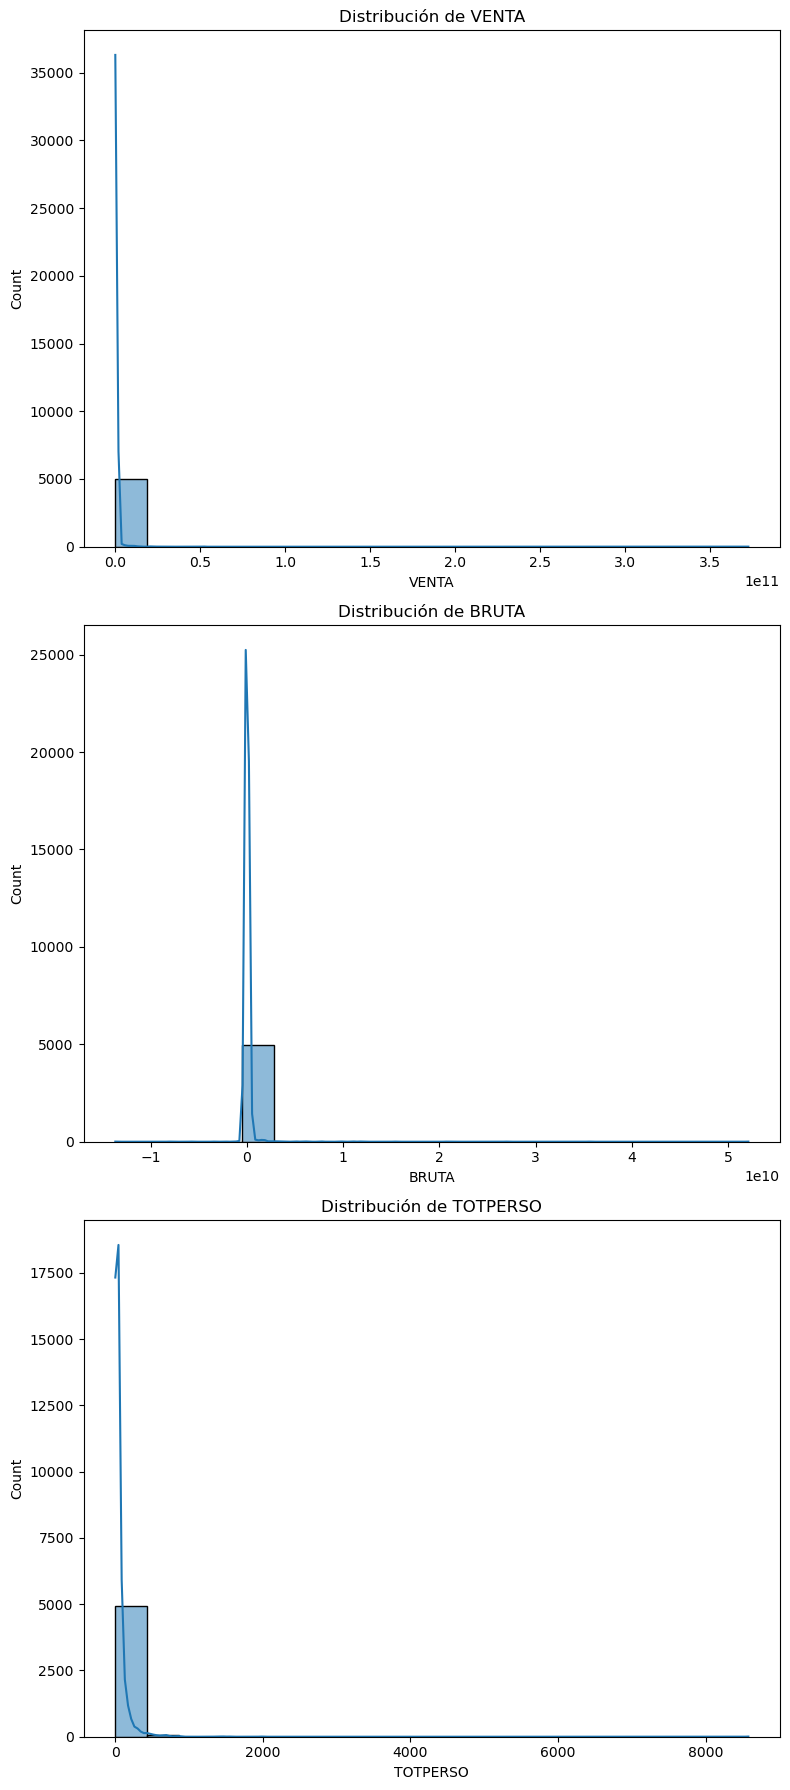

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


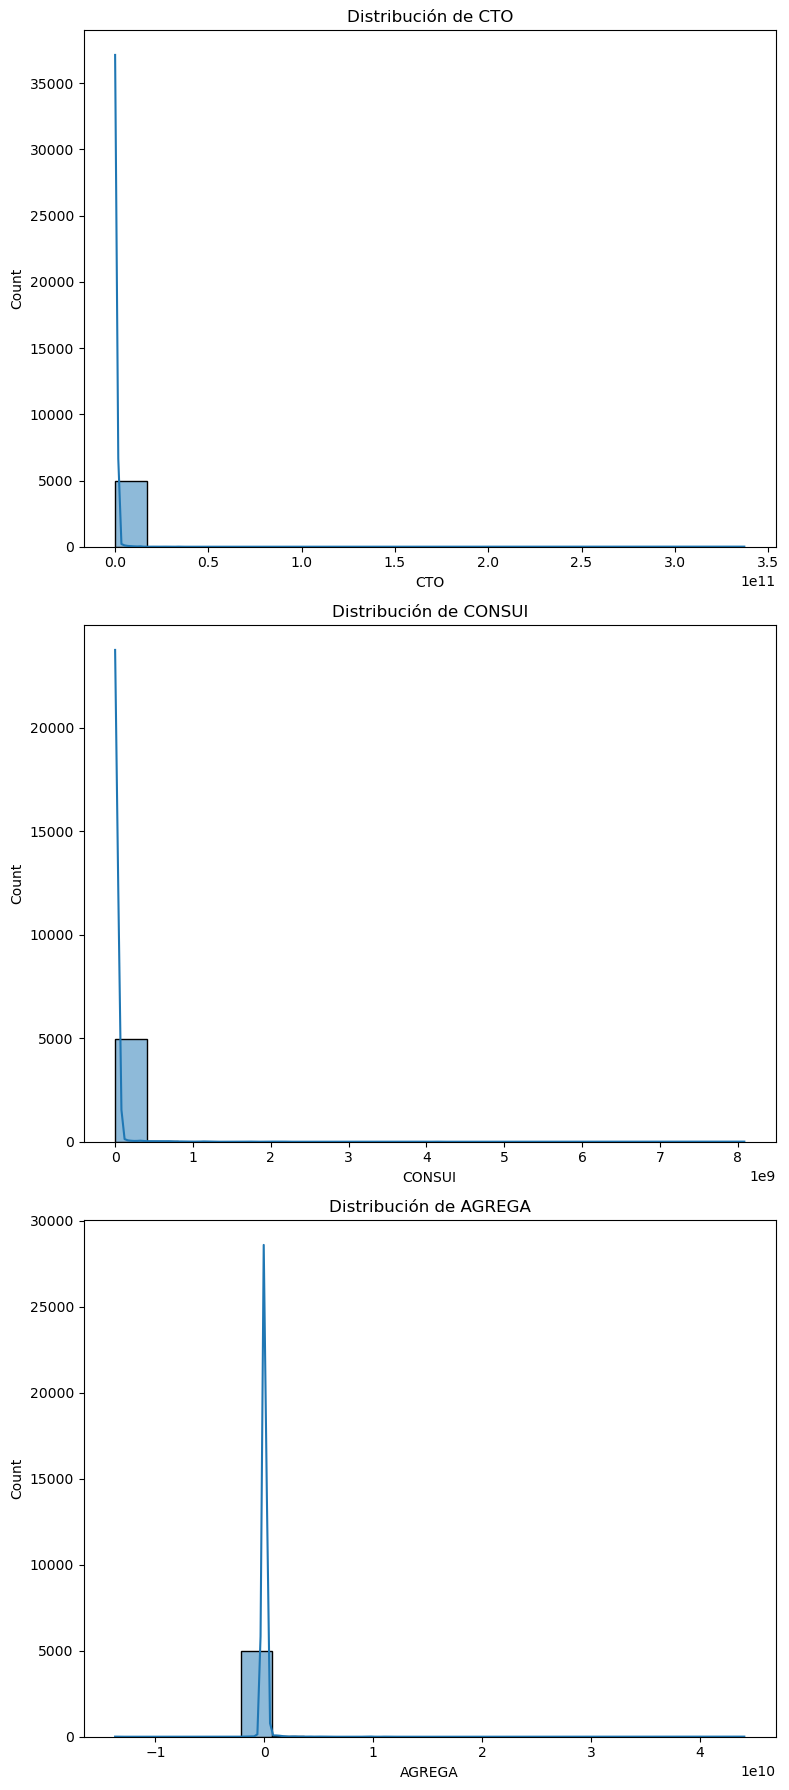

In [14]:
# Filtrar variables categóricas, numéricas enteras y numéricas de punto flotante
columnas_categoricas = data[variables_principales].select_dtypes(include='bool').columns
columnas_enteras = data[variables_principales].select_dtypes(include='int64').columns
columnas_float = data[variables_principales].select_dtypes(include='float64').columns

# Visualizar la distribución de variables categóricas
f, axes = plt.subplots(len(columnas_categoricas), 1, figsize=(8, 6*len(columnas_categoricas)))
for i, columna in enumerate(columnas_categoricas):
    sns.countplot(data[columna], ax=axes[i])
    axes[i].set_title(f'Distribución de {columna}')

plt.tight_layout()
plt.show()

# Visualizar la distribución de variables numéricas enteras
f, axes = plt.subplots(len(columnas_enteras), 1, figsize=(8, 6*len(columnas_enteras)))
for i, columna in enumerate(columnas_enteras):
    sns.histplot(data[columna], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {columna}')

plt.tight_layout()
plt.show()

# Visualizar la distribución de variables numéricas de punto flotante
f, axes = plt.subplots(len(columnas_float), 1, figsize=(8, 6*len(columnas_float)))
for i, columna in enumerate(columnas_float):
    sns.histplot(data[columna], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {columna}')

plt.tight_layout()
plt.show()


In [15]:
# Obtener estadísticas descriptivas para variables numéricas
numeric_stats = data[variables_principales].describe()

# Visualizar las estadísticas
print(numeric_stats)


              VENTA           CTO         BRUTA        CONSUI        AGREGA  \
count  5.012000e+03  5.006000e+03  5.012000e+03  5.012000e+03  5.012000e+03   
mean   2.518875e+08  1.838153e+08  6.786119e+07  1.565873e+07  5.220247e+07   
std    5.543450e+09  4.905358e+09  1.166092e+09  1.814799e+08  1.045230e+09   
min    0.000000e+00  0.000000e+00 -1.368160e+10  0.000000e+00 -1.368384e+10   
25%    4.991760e+06  3.389143e+06  1.032990e+06  2.758550e+05  6.478091e+05   
50%    1.189509e+07  8.823840e+06  2.521060e+06  6.798655e+05  1.683974e+06   
75%    3.111306e+07  2.346052e+07  7.082606e+06  1.864755e+06  4.910542e+06   
max    3.727657e+11  3.372304e+11  5.212670e+10  8.083008e+09  4.404369e+10   

          TOTPERSO  
count  5012.000000  
mean     53.659617  
std     153.653021  
min       0.000000  
25%      13.000000  
50%      25.000000  
75%      50.000000  
max    8580.000000  


In [16]:
# Obtener recuentos de valores para variables categóricas
for columna in columnas_categoricas:
    value_counts = data[columna].value_counts()
    print(f'Recuentos de valores para {columna}:\n{value_counts}\n')


Recuentos de valores para DIV_CIIU_45:
DIV_CIIU_45
False    4560
True      452
Name: count, dtype: int64

Recuentos de valores para DIV_CIIU_46:
DIV_CIIU_46
True     2948
False    2064
Name: count, dtype: int64

Recuentos de valores para DIV_CIIU_47:
DIV_CIIU_47
False    3400
True     1612
Name: count, dtype: int64



Matriz de correlación:
                VENTA       CTO     BRUTA    CONSUI    AGREGA  TOTPERSO  \
VENTA        1.000000  0.991150  0.622497  0.503984  0.606973  0.019419   
CTO          0.991150  1.000000  0.600028  0.515827  0.559408  0.016814   
BRUTA        0.622497  0.600028  1.000000  0.709283  0.992482  0.021562   
CONSUI       0.503984  0.515827  0.709283  1.000000  0.617672  0.051421   
AGREGA       0.606973  0.559408  0.992482  0.617672  1.000000  0.015128   
TOTPERSO     0.019419  0.016814  0.021562  0.051421  0.015128  1.000000   
DIV_CIIU_45 -0.006895 -0.007178 -0.002656 -0.015659 -0.000244  0.012762   
DIV_CIIU_46  0.020566  0.019629  0.015190  0.020516  0.013384 -0.018256   
DIV_CIIU_47 -0.017441 -0.016279 -0.014376 -0.012014 -0.013952  0.011409   

             DIV_CIIU_45  DIV_CIIU_46  DIV_CIIU_47  
VENTA          -0.006895     0.020566    -0.017441  
CTO            -0.007178     0.019629    -0.016279  
BRUTA          -0.002656     0.015190    -0.014376  
CONSUI        

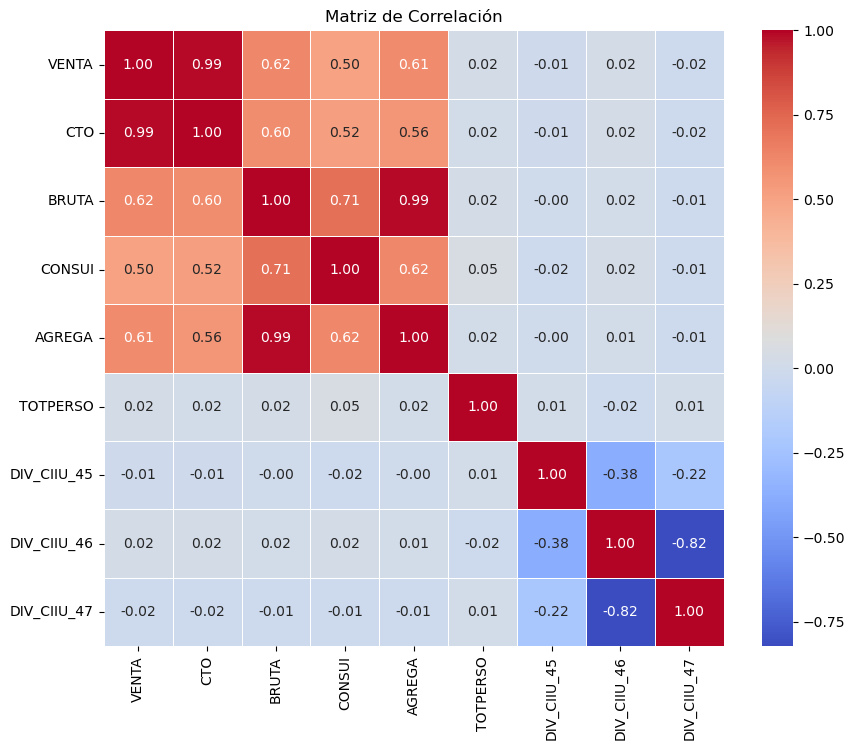

In [17]:
# Se crea un nuevo data frame con solo las columnas o varibales seleccionadas llamado 'variables_principales_df' seleccionando
# solo las columnas especificadas en la lista 'variables_principales' del dataframe original llamada 'data'
variables_principales_df = data[variables_principales]

# Calcular la matriz de correlación, Se utiliza el método corr() del DataFrame para calcular la matriz de correlación entre
#todas las variables seleccionadas en variables_principales_df. La matriz de correlación muestra cómo están relacionadas 
#linealmente las diferentes variables entre sí.

correlation_matrix = variables_principales_df.corr()

# Mostrar o imprimir la matriz de correlación en la consola
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación utilizando un mapa de calor (heatmap) de seaborn
plt.figure(figsize=(10, 8)) #tamaño de la matriz
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5) # annot=True; muestra los valores de 
#correlación en cada celda, cmap='coolwarm' es la paleta de colores; fmt = '2f' formato de valores mostrado en cada celda, 
# para este caso, dos decimales, linewidth=5; ancho de las líneas.
plt.title('Matriz de Correlación')
plt.show()


De acuerdo con la matriz de correlación previa, se busca eliminar aquellas variables que estén altamente correlacionadas entre sí. Esto se debe a que altas correlaciones indican que una variable puede explicar la variación de otras. Tener ambas variables en el modelo podría redundar en la introducción de información redundante y, por ende, no aportar significativamente a la capacidad explicativa del modelo. En otras palabras, se estaría incurriendo en la sobreespecificación del modelo, lo que podría afectar negativamente su capacidad para generalizar patrones en datos no observados. Por tanto, la selección cuidadosa de variables es esencial para construir un modelo más parsimonioso y efectivo. En este caso específico, se podría considerar la eliminación de una de las variables altamente correlacionadas, como por ejemplo, entre 'VENTA' y 'CTO', con el objetivo de mejorar la simplicidad y la interpretabilidad del modelo. No obstante, cualquier decisión de exclusión debe basarse en un entendimiento profundo del dominio y en la evaluación del impacto en el rendimiento del modelo.

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

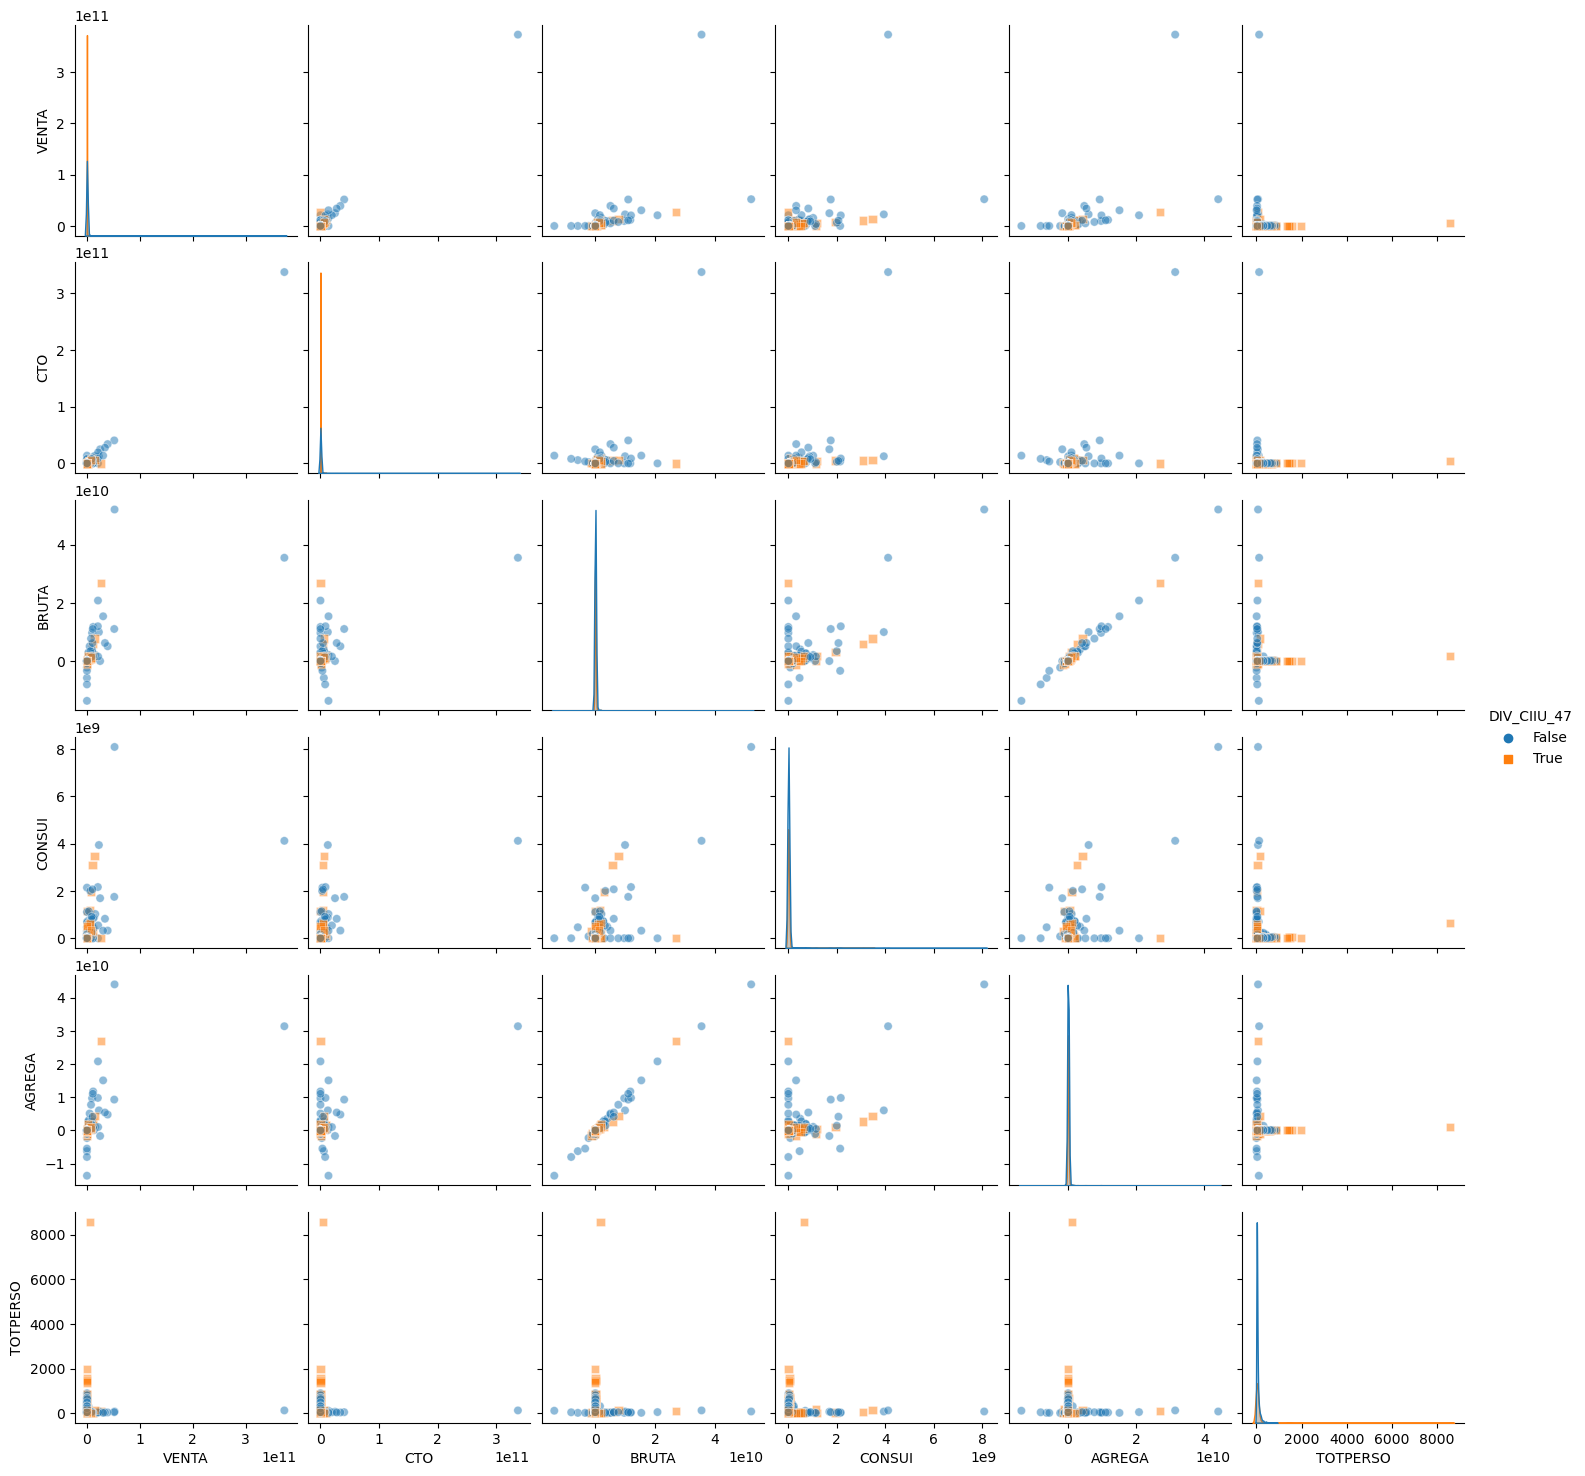

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las variables numéricas
variables_numericas = data[variables_principales].select_dtypes(include=['int64', 'float64'])

# Agregar la variable categórica DIV_CIIU_47
variables_numericas['DIV_CIIU_47'] = data['DIV_CIIU_47']


sns.pairplot(variables_numericas, hue='DIV_CIIU_47', markers=["o", "s", "D"], plot_kws={'alpha': 0.5}) # Visualizar la matriz de dispersión con Seaborn pairplot
plt.show()

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


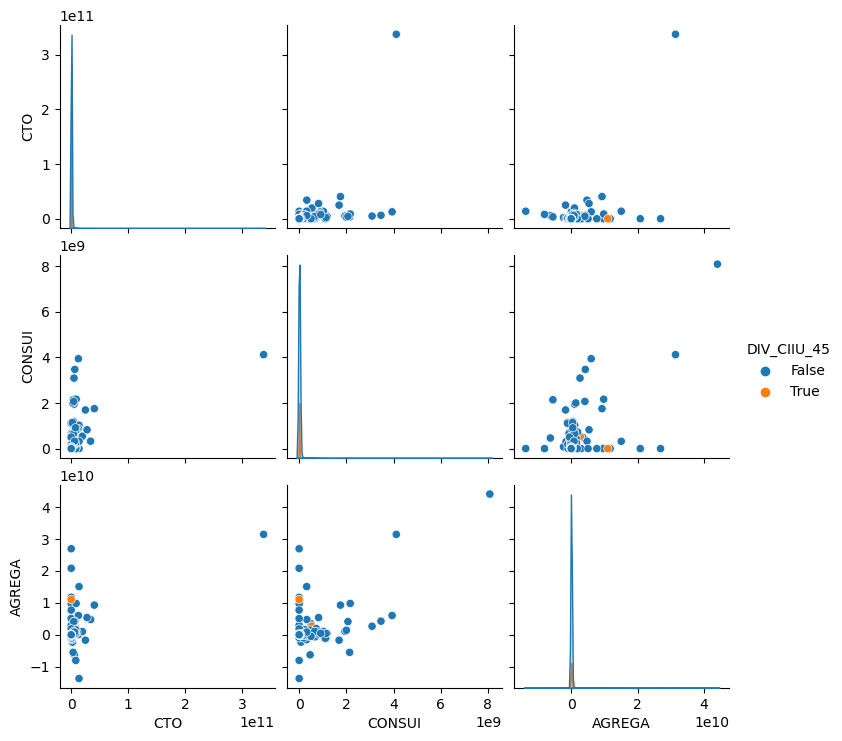

In [48]:
# Seleccionar solo las variables numéricas
variables_numericas = data[variables_principales].select_dtypes(include='float64')

# Añadir la variable categórica DIV_CIIU_47 para colorear las observaciones
variables_numericas['DIV_CIIU_45'] = data['DIV_CIIU_45']

# Visualizar la matriz de dispersión
sns.pairplot(variables_numericas, hue='DIV_CIIU_45', diag_kind='kde')
plt.show()

Matriz de correlación sin CTO:
                VENTA     BRUTA    CONSUI    AGREGA  TOTPERSO  DIV_CIIU_45  \
VENTA        1.000000  0.622497  0.503984  0.606973  0.019419    -0.006895   
BRUTA        0.622497  1.000000  0.709283  0.992482  0.021562    -0.002656   
CONSUI       0.503984  0.709283  1.000000  0.617672  0.051421    -0.015659   
AGREGA       0.606973  0.992482  0.617672  1.000000  0.015128    -0.000244   
TOTPERSO     0.019419  0.021562  0.051421  0.015128  1.000000     0.012762   
DIV_CIIU_45 -0.006895 -0.002656 -0.015659 -0.000244  0.012762     1.000000   
DIV_CIIU_46  0.020566  0.015190  0.020516  0.013384 -0.018256    -0.376267   
DIV_CIIU_47 -0.017441 -0.014376 -0.012014 -0.013952  0.011409    -0.216785   

             DIV_CIIU_46  DIV_CIIU_47  
VENTA           0.020566    -0.017441  
BRUTA           0.015190    -0.014376  
CONSUI          0.020516    -0.012014  
AGREGA          0.013384    -0.013952  
TOTPERSO       -0.018256     0.011409  
DIV_CIIU_45    -0.376267  

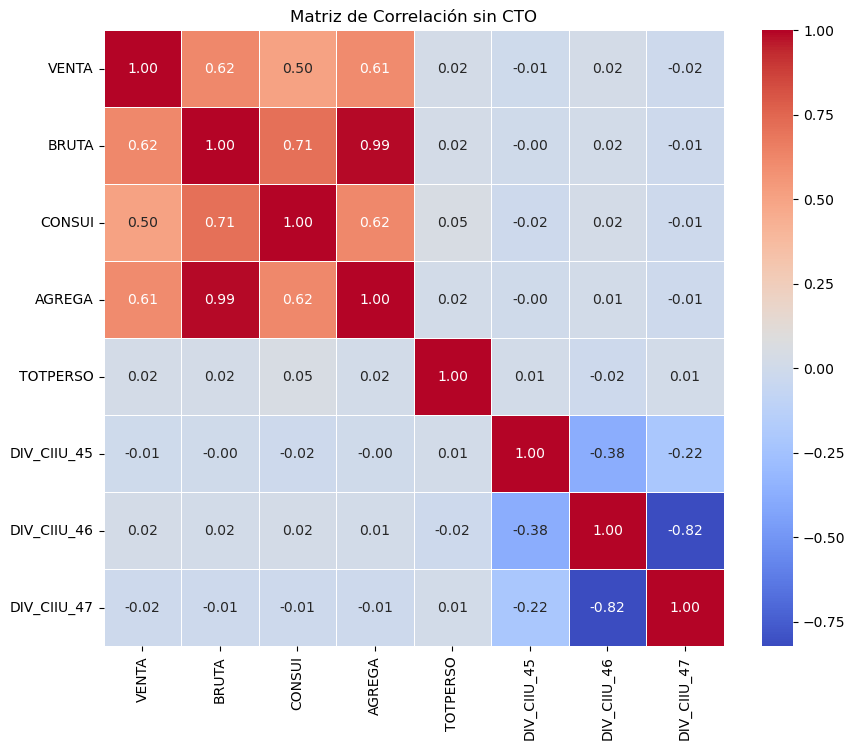

In [18]:
# se creará un nuevo vector, el cual se quitará la variable CTO, por su alta correlación con VTA
# Quitar la variable 'CTO' del conjunto de datos
variables_principales_sin_cto = variables_principales_df.drop('CTO', axis=1)

# Calcular la matriz de correlación sin la variable 'CTO'
correlation_matrix_sin_cto = variables_principales_sin_cto.corr()

# Mostrar la matriz de correlación sin 'CTO'
print("Matriz de correlación sin CTO:")
print(correlation_matrix_sin_cto)

# Visualizar la matriz de correlación sin 'CTO' utilizando un mapa de calor (heatmap) de seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_sin_cto, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación sin CTO')
plt.show()




Como las variable AGREGA y BRUTA, tienen una alta correlación, y la eliminación de la variabel CTO no mejoró sus coeficientes entonces se procederá a eliminar AGREGA, y evaluar sus resultados.

Matriz de correlación sin CTO y AGREGA:
                VENTA     BRUTA    CONSUI  TOTPERSO  DIV_CIIU_45  DIV_CIIU_46  \
VENTA        1.000000  0.622497  0.503984  0.019419    -0.006895     0.020566   
BRUTA        0.622497  1.000000  0.709283  0.021562    -0.002656     0.015190   
CONSUI       0.503984  0.709283  1.000000  0.051421    -0.015659     0.020516   
TOTPERSO     0.019419  0.021562  0.051421  1.000000     0.012762    -0.018256   
DIV_CIIU_45 -0.006895 -0.002656 -0.015659  0.012762     1.000000    -0.376267   
DIV_CIIU_46  0.020566  0.015190  0.020516 -0.018256    -0.376267     1.000000   
DIV_CIIU_47 -0.017441 -0.014376 -0.012014  0.011409    -0.216785    -0.822909   

             DIV_CIIU_47  
VENTA          -0.017441  
BRUTA          -0.014376  
CONSUI         -0.012014  
TOTPERSO        0.011409  
DIV_CIIU_45    -0.216785  
DIV_CIIU_46    -0.822909  
DIV_CIIU_47     1.000000  


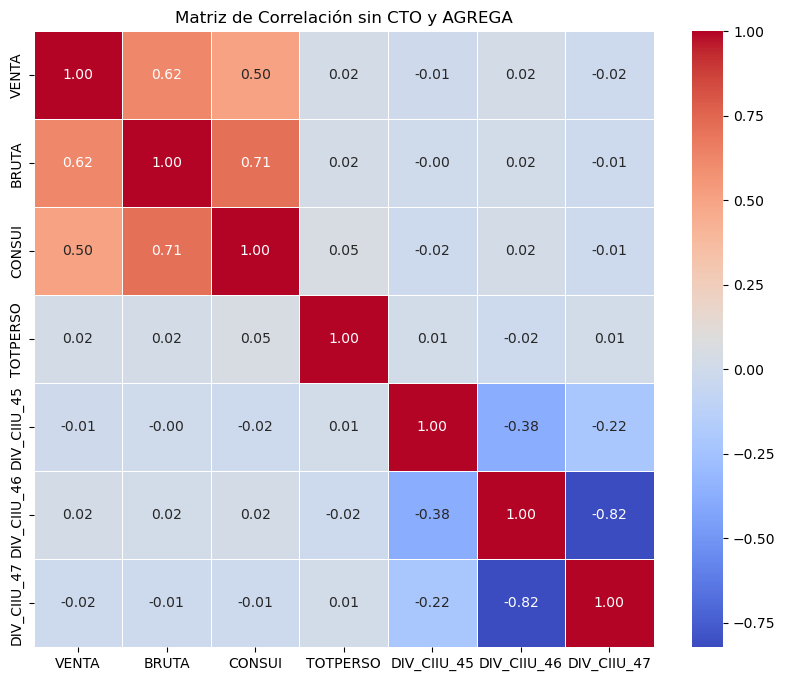

In [19]:
# Quitaremos la variable 'AGREGA' del conjunto de datos
variables_principales_sin_cto_agrega = variables_principales_df.drop(['CTO', 'AGREGA'], axis=1)

# Calculamos la nueva matriz de correlación sin las variables 'CTO' y 'AGREGA'
correlation_matrix_sin_cto_agrega = variables_principales_sin_cto_agrega.corr()

# Visualización de la matriz de correlación sin 'CTO' y 'AGREGA'
print("Matriz de correlación sin CTO y AGREGA:")
print(correlation_matrix_sin_cto_agrega)

# Visualizar la matriz de correlación sin 'CTO' y 'AGREGA' utilizando un mapa de calor (heatmap) de seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_sin_cto_agrega, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación sin CTO y AGREGA')
plt.show()


Matriz de correlación sin CTO y AGREGA:
             VENTA     BRUTA    CONSUI  TOTPERSO
VENTA     1.000000  0.622497  0.503984  0.019419
BRUTA     0.622497  1.000000  0.709283  0.021562
CONSUI    0.503984  0.709283  1.000000  0.051421
TOTPERSO  0.019419  0.021562  0.051421  1.000000


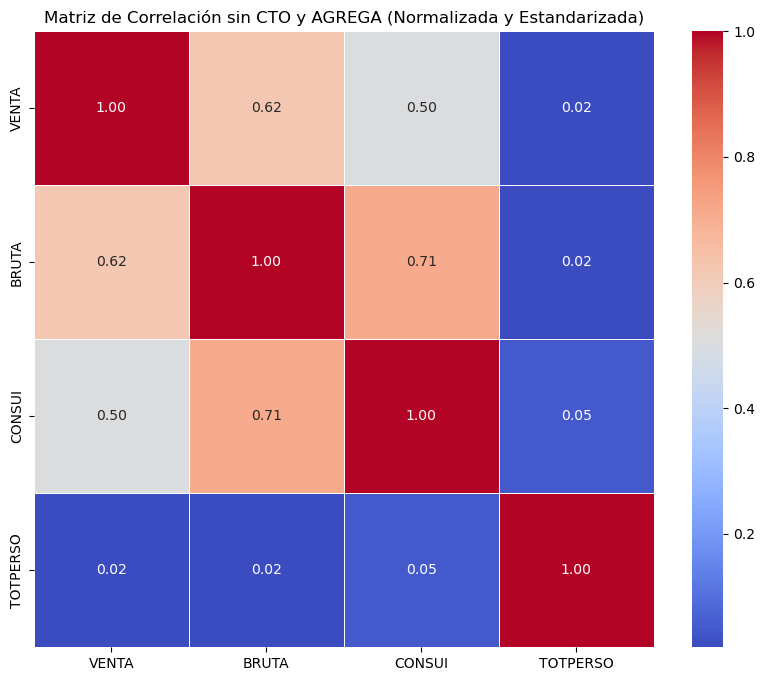

In [51]:
# se reescalaran y normalizaran los datos

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Seleccionar solo las variables numéricas del conjunto sin CTO y AGREGA
variables_numericas_sin_cto_agrega = variables_principales_sin_cto_agrega.select_dtypes(include=['float64', 'int64'])

# Iniciamos los scalers para normalización y estandarización
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# Normalizamos y estandarizamos las variables numéricas
variables_normalizadas_estandarizadas_sin_cto_agrega = scaler_standard.fit_transform(scaler_minmax.fit_transform(variables_numericas_sin_cto_agrega))

# Creamos un nuevo DataFrame con las variables normalizadas y estandarizadas
data_normalizada_estandarizada_sin_cto_agrega = pd.DataFrame(variables_normalizadas_estandarizadas_sin_cto_agrega, columns=variables_numericas_sin_cto_agrega.columns)

# Calculamos la matriz de correlación
correlation_matrix_sin_cto_agrega = data_normalizada_estandarizada_sin_cto_agrega.corr()

# Mostramos la matriz de correlación
print("Matriz de correlación sin CTO y AGREGA:")
print(correlation_matrix_sin_cto_agrega)

# Visualizamos la matriz de correlación utilizando un mapa de calor (heatmap) de seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_sin_cto_agrega, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación sin CTO y AGREGA (Normalizada y Estandarizada)')
plt.show()


A tener en cuenta: 
De acuerdo con el análisis con este tipo de variables con caracteristicas financieras, se ha observado una correlación positiva entre las variables 'VENTA' y 'BRUTA', así como entre 'VENTA' y 'CONSUI'. Esta relación sugiere que, en general, cuando los ingresos brutos ('BRUTA') o el consumo de insumos ('CONSUI') aumentan, también tiende a incrementarse la variable 'VENTA'. Sin embargo, es crucial recordar que la correlación no implica causalidad, y otras explicaciones, como factores externos no considerados en este análisis o coincidencias estadísticas, podrían estar influyendo en estas relaciones aparentes. 

C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LenovoP50\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


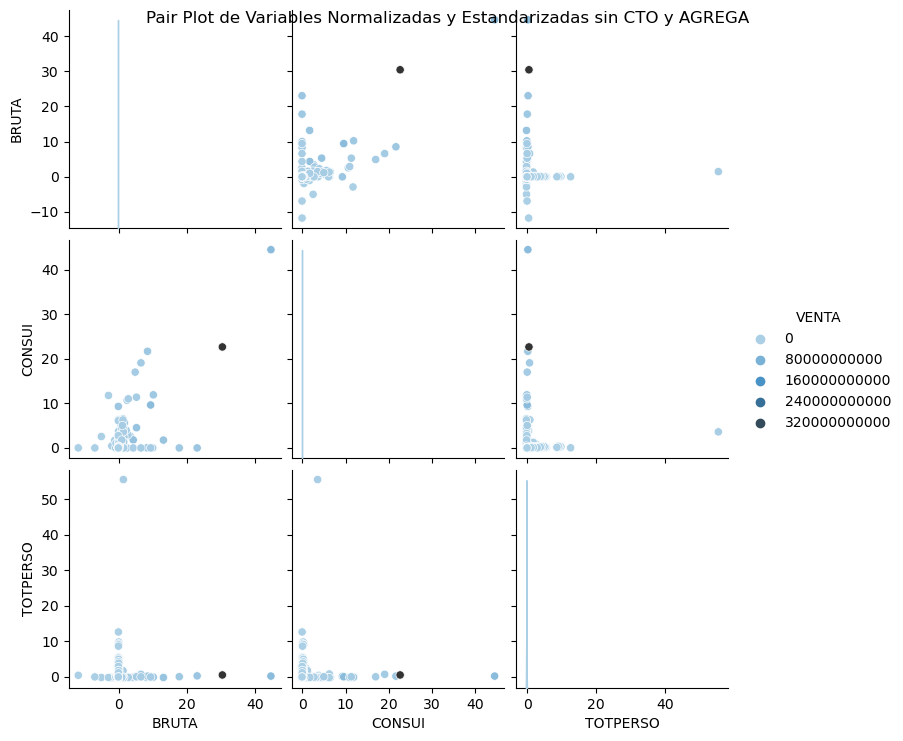

In [52]:
# Visualización de los datos normalizados y estandarizados basado en la variable VENTA, el cual se toma como variable objetivo 
# para el análisis del pair plot, y por lo tanto, se elige como la variable el cual se visualizaran las relaciones y 
# distribuciones entre las variables predictoras normalizadas y estandarizadas

data_normalizada_estandarizada_sin_cto_agrega['VENTA'] = variables_principales_sin_cto_agrega['VENTA']

# usaremos pairplot para visualizar la distribución y relaciones entre las variables
sns.pairplot(data_normalizada_estandarizada_sin_cto_agrega, hue='VENTA', markers='o', palette='Blues_d')
plt.suptitle('Pair Plot de Variables Normalizadas y Estandarizadas sin CTO y AGREGA')
plt.show()

A tener en cuenta:
Normalizar y estandarizar las variables en una red neuronal es una practica común que ayuda a mejorar el rendimiento y la convergencia del modelo, aqui se expondran algunas razones clave para realizar este tipo de procesos: 
1. Facilita la convergencia: 
Al normalizar y estandarizar ayuda a que la función de pérdida converja más rápidamente durante el entrenamiento. Al escalar las variables, se ajustan los gradientes y se evitan los problemas relacionados con la escala que pueden dificultar la convergencia.
2. Evita la dominancia de Características:
En presencia de variables con diferentes escalas, las caracteristicas con valores más grandes pueden dominar y afectar de manera desproporcionada al proceso de entrenamiento. Normalizar y estandarizar ayuda a evitar que una caracteristica tenga un impacto esxesivo simplemente debido a su escala.
3. Mejora la estabilidad númerica:
algunas funciones de activación y operaciones matriciales, los valores grandes pueden conducir a problemas de estabilidad numérica, como el desbordamiento o la pérdida de precisión. Normalizar y estandarizar ayuda a mantener los valores dentro de un rango mas manejable.

luego de normalizar las variables, se procederá a reescalarlos con StandardScaler StandardScaler es una herramienta comunmente utilizada en el ambito de aprendizaje automático para estandarizar (normalizar) las caracteristicas de un conjunto de datos.



Epoch 1/50


126/126 - 1s - loss: 0.7993 - mae: 0.0671 - val_loss: 0.0084 - val_mae: 0.0196 - 1s/epoch - 11ms/step
Epoch 2/50
126/126 - 0s - loss: 0.7198 - mae: 0.0435 - val_loss: 0.0089 - val_mae: 0.0421 - 248ms/epoch - 2ms/step
Epoch 3/50
126/126 - 0s - loss: 0.6536 - mae: 0.0503 - val_loss: 0.0127 - val_mae: 0.0387 - 265ms/epoch - 2ms/step
Epoch 4/50
126/126 - 0s - loss: 0.7385 - mae: 0.0622 - val_loss: 0.0137 - val_mae: 0.0531 - 272ms/epoch - 2ms/step
Epoch 5/50
126/126 - 0s - loss: 0.7581 - mae: 0.0754 - val_loss: 0.0116 - val_mae: 0.0284 - 242ms/epoch - 2ms/step
Epoch 6/50
126/126 - 0s - loss: 0.6738 - mae: 0.0569 - val_loss: 0.0127 - val_mae: 0.0444 - 265ms/epoch - 2ms/step
Epoch 7/50
126/126 - 0s - loss: 0.7216 - mae: 0.0649 - val_loss: 0.0095 - val_mae: 0.0230 - 266ms/epoch - 2ms/step
Epoch 8/50
126/126 - 0s - loss: 0.6452 - mae: 0.0578 - val_loss: 0.0082 - val_mae: 0.0198 - 250ms/epoch - 2ms/step
Epoch 9/50
126/126 - 0s - loss: 0.6451 - mae: 0.0472 - val_loss: 0.0119 - val_

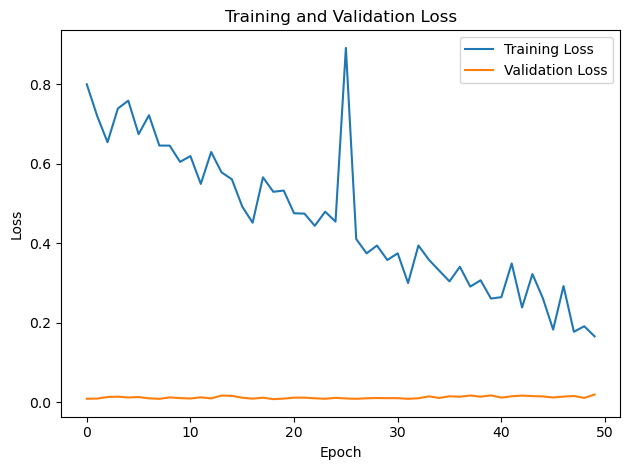

32/32 [==============================] - 0s 1ms/step
Índices de datos anómalos: [ 22 400 508 549 613 683 815 940]


In [21]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las variables predictoras (X) y la variable de salida (y)
X = variables_principales_sin_cto_agrega.drop(['VENTA'], axis=1)
y = variables_principales_sin_cto_agrega['VENTA']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Construimos el modelo de regresión
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Capa de salida lineal para regresión

# Compilamos el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_scaled), verbose=2)

# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f'Mean Absolute Error (MAE) en el conjunto de prueba: {mae}')

# Visualizamos la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Predicciones en el conjunto de prueba
predictions_scaled = model.predict(X_test_scaled)

# Desnormalizar las predicciones
predictions = scaler_y.inverse_transform(predictions_scaled)

residuals = y_test.values - predictions.flatten() # --> Calcular los residuos (diferencia entre las predicciones y los valores reales)

# Calcular la desviación estándar de los residuos
std_dev_residuals = np.std(residuals)

anomaly_threshold = 3 * std_dev_residuals # --> Definir un umbral para detectar anomalías (por ejemplo, 3 veces la desviación estándar)

anomalies = np.where(np.abs(residuals) > anomaly_threshold)[0] # -- > Identificamos los índices de los datos anómalos

print("Índices de datos anómalos:", anomalies) # --> Mostramos los índices de los datos anómalos





Epoch 1/50


126/126 - 2s - loss: 0.8898 - mae: 0.0522 - val_loss: 0.0069 - val_mae: 0.0203 - 2s/epoch - 13ms/step
Epoch 2/50
126/126 - 0s - loss: 0.8967 - mae: 0.0472 - val_loss: 0.0086 - val_mae: 0.0232 - 268ms/epoch - 2ms/step
Epoch 3/50
126/126 - 0s - loss: 0.8366 - mae: 0.0429 - val_loss: 0.0106 - val_mae: 0.0170 - 279ms/epoch - 2ms/step
Epoch 4/50
126/126 - 0s - loss: 0.8270 - mae: 0.0449 - val_loss: 0.0083 - val_mae: 0.0166 - 271ms/epoch - 2ms/step
Epoch 5/50
126/126 - 0s - loss: 0.8599 - mae: 0.0468 - val_loss: 0.0091 - val_mae: 0.0206 - 274ms/epoch - 2ms/step
Epoch 6/50
126/126 - 0s - loss: 0.8543 - mae: 0.0455 - val_loss: 0.0123 - val_mae: 0.0242 - 253ms/epoch - 2ms/step
Epoch 7/50
126/126 - 0s - loss: 0.9085 - mae: 0.0559 - val_loss: 0.0103 - val_mae: 0.0251 - 259ms/epoch - 2ms/step
Epoch 8/50
126/126 - 0s - loss: 0.8163 - mae: 0.0456 - val_loss: 0.0106 - val_mae: 0.0298 - 253ms/epoch - 2ms/step
Epoch 9/50
126/126 - 0s - loss: 0.8139 - mae: 0.0512 - val_loss: 0.0072 - val_

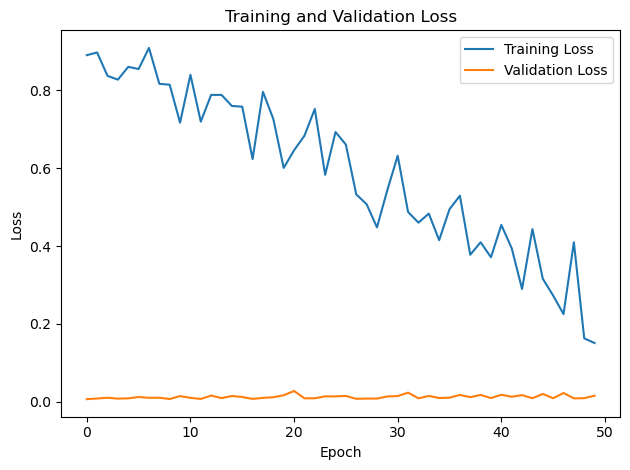

32/32 [==============================] - 0s 1ms/step
Valores atípicos: [ 13  15  22  58 400 411 445 508 549 613 683 815 821 940 942]


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Seleccionar solo las variables numéricas del conjunto sin CTO y AGREGA
variables_numericas_sin_cto_agrega = data[['VENTA', 'BRUTA', 'CONSUI', 'TOTPERSO']]

# Inicializar los scalers para normalización y estandarización
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# Normalizar y estandarizar las variables numéricas
variables_normalizadas_estandarizadas_sin_cto_agrega = scaler_standard.fit_transform(scaler_minmax.fit_transform(variables_numericas_sin_cto_agrega))

# Crear un nuevo DataFrame con las variables normalizadas y estandarizadas
data_normalizada_estandarizada_sin_cto_agrega = pd.DataFrame(variables_normalizadas_estandarizadas_sin_cto_agrega, columns=variables_numericas_sin_cto_agrega.columns)

# Seleccionar la variable de entrada (X) y la variable de salida (y)
X = data_normalizada_estandarizada_sin_cto_agrega.drop(columns=['VENTA'])  # Usar todas las características excepto 'VENTA' como entrada
y = data_normalizada_estandarizada_sin_cto_agrega['VENTA']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el modelo de regresión
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Cambiar la activación a 'linear' para regresión

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Absolute Error (MAE) en el conjunto de prueba: {mae}')

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Mostrar los valores atípicos
outliers = np.where(np.abs(y_test.values - predictions.flatten()) > 3 * np.std(y_test.values))[0]
print("Valores atípicos:", outliers)


Epoch 1/50
126/126 - 1s - loss: 2.8163 - mae: 0.0481 - val_loss: 1.0569 - val_mae: 0.0360 - 1s/epoch - 11ms/step
Epoch 2/50
126/126 - 0s - loss: 1.5723 - mae: 0.0443 - val_loss: 0.4657 - val_mae: 0.0135 - 244ms/epoch - 2ms/step
Epoch 3/50
126/126 - 0s - loss: 1.3150 - mae: 0.0415 - val_loss: 0.3765 - val_mae: 0.0411 - 245ms/epoch - 2ms/step
Epoch 4/50
126/126 - 0s - loss: 1.2157 - mae: 0.0664 - val_loss: 0.3479 - val_mae: 0.0245 - 246ms/epoch - 2ms/step
Epoch 5/50
126/126 - 0s - loss: 1.1059 - mae: 0.0446 - val_loss: 0.3057 - val_mae: 0.0167 - 252ms/epoch - 2ms/step
Epoch 6/50
126/126 - 0s - loss: 1.1029 - mae: 0.0493 - val_loss: 0.2911 - val_mae: 0.0250 - 257ms/epoch - 2ms/step
Epoch 7/50
126/126 - 0s - loss: 1.1015 - mae: 0.0470 - val_loss: 0.2680 - val_mae: 0.0519 - 251ms/epoch - 2ms/step
Epoch 8/50
126/126 - 0s - loss: 1.0555 - mae: 0.0497 - val_loss: 0.2524 - val_mae: 0.0428 - 250ms/epoch - 2ms/step
Epoch 9/50
126/126 - 0s - loss: 1.0644 - mae: 0.0520 - val_loss: 0.2443 - val_mae:

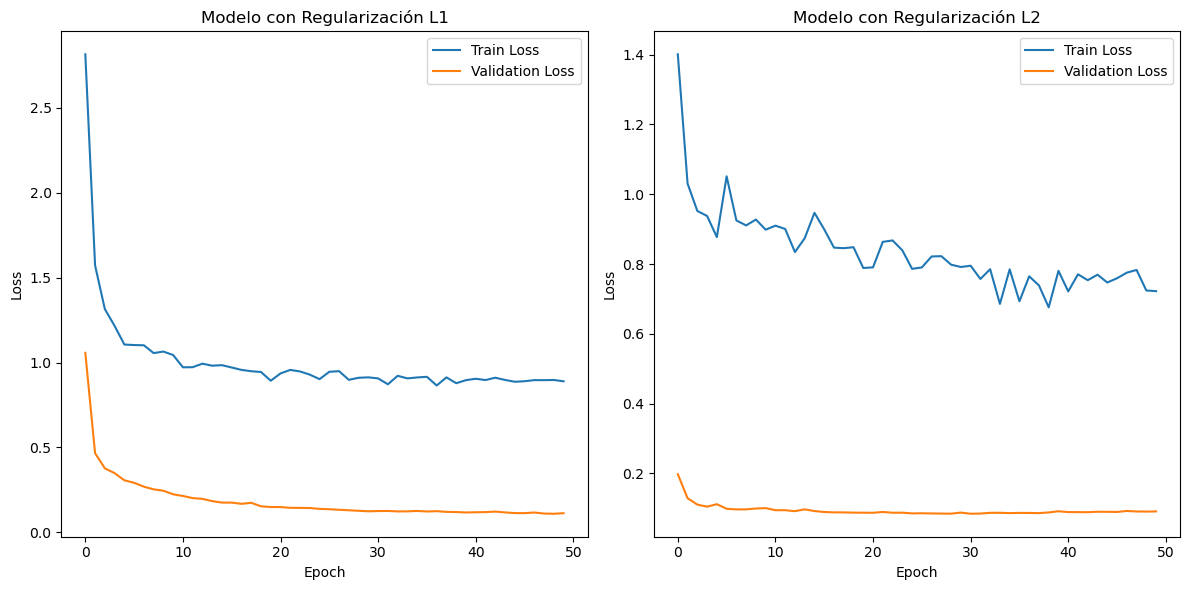

In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Construimos el modelo de regresión con regularización L1
model_l1 = Sequential()
model_l1.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(1, activation='linear'))

# Compilamos el modelo con los parámetros segun L1
model_l1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Entrenamos el modelo
history_l1 = model_l1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Construimos el modelo de regresión con regularización L2
model_l2 = Sequential()
model_l2.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(1, activation='linear'))

# Compilamos el modelo segun modelo L2
model_l2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Entrenamos el modelo
history_l2 = model_l2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Gráficamos de los resultados de entrenamiento
plt.figure(figsize=(12, 6))

# Pérdida o LOSS para regularización L1
plt.subplot(1, 2, 1)
plt.plot(history_l1.history['loss'], label='Train Loss')
plt.plot(history_l1.history['val_loss'], label='Validation Loss')
plt.title('Modelo con Regularización L1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Pérdida O LOSS para regularización L2
plt.subplot(1, 2, 2)
plt.plot(history_l2.history['loss'], label='Train Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.title('Modelo con Regularización L2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_excel('EAC_REP_VARCUA_2022.xlsx')

#### --> Seleccionamos la variable de entrada (X) y la variable de salida (y)
X = data.drop(columns=['VENTA'])  # Tomamos todas las columnas excepto 'VENTA' como variables de entrada
y = data['VENTA']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Construimos el modelo de regresión
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilamos el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Entrenamos el modelo
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_scaled), verbose=2)

# Evaluamos el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f'Mean Absolute Error (MAE) en el conjunto de prueba: {mae}')

# Visualizamos la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Calcular los residuos (diferencia entre las predicciones y los valores reales)
residuals = y_test_scaled - predictions

# Calcular la desviación estándar de los residuos
std_dev_residuals = np.std(residuals)

# Definir un umbral para detectar anomalías (por ejemplo, 3 veces la desviación estándar)
anomaly_threshold = 3 * std_dev_residuals

# Identificar los índices de los datos anómalos
anomalies = np.where(np.abs(residuals) > anomaly_threshold)[0]

# Mostrar los índices de los datos anómalos
print("Índices de datos anómalos:", anomalies)


32/32 [==============================] - 0s 2ms/step


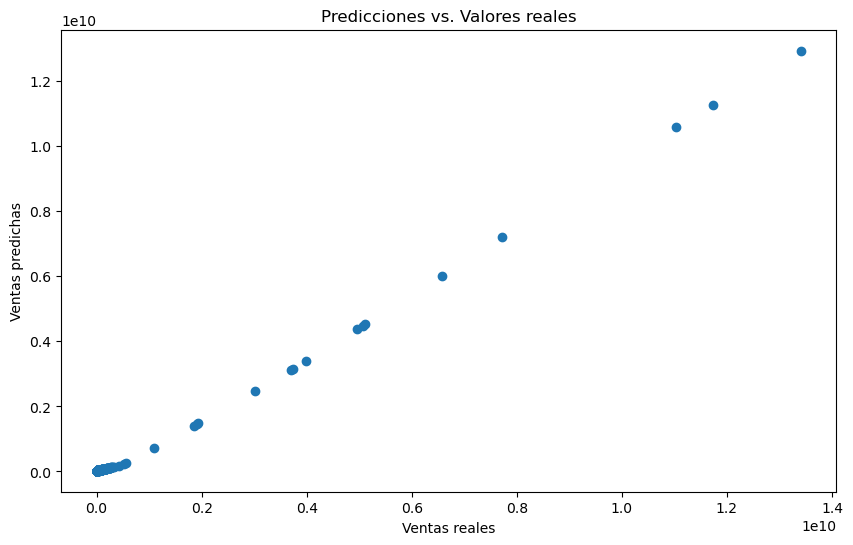

In [46]:
# Hacer predicciones en el conjunto de prueba
predictions_scaled = model.predict(X_test_scaled)

# Desnormalizar las predicciones y los valores reales
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_actual = scaler_y.inverse_transform(y_test_scaled)

# Visualizar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, predictions)
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')
plt.title('Predicciones vs. Valores reales')
plt.show()

In [47]:
regla de tukey 

# Obtener las predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Calcular los residuos
residuals = y_test_scaled - predictions.reshape(-1)

# Calcular el rango intercuartílico (IQR)
Q1 = np.percentile(residuals, 25)
Q3 = np.percentile(residuals, 75)
IQR = Q3 - Q1

# Definir límites para identificar valores atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = (residuals < lower_limit) | (residuals > upper_limit)

# Mostrar estadísticas sobre valores atípicos
print(f'Número de valores atípicos: {np.sum(outliers)}')
print(f'Porcentaje de valores atípicos: {np.mean(outliers) * 100}%')


32/32 [==============================] - 0s 2ms/step
Número de valores atípicos: 176249
Porcentaje de valores atípicos: 17.519624575923277%


In [48]:
# Obtener las filas con valores atípicos
outliers_rows = X_test[outliers]

# Mostrar las filas con valores atípicos
print("Filas con valores atípicos:")
print(outliers_rows)


Filas con valores atípicos:
         VENTA
4871  16299660
4871  16299660
4871  16299660
4871  16299660
4871  16299660
...        ...
3288  51969391
3288  51969391
3288  51969391
3288  51969391
3288  51969391

[176249 rows x 1 columns]


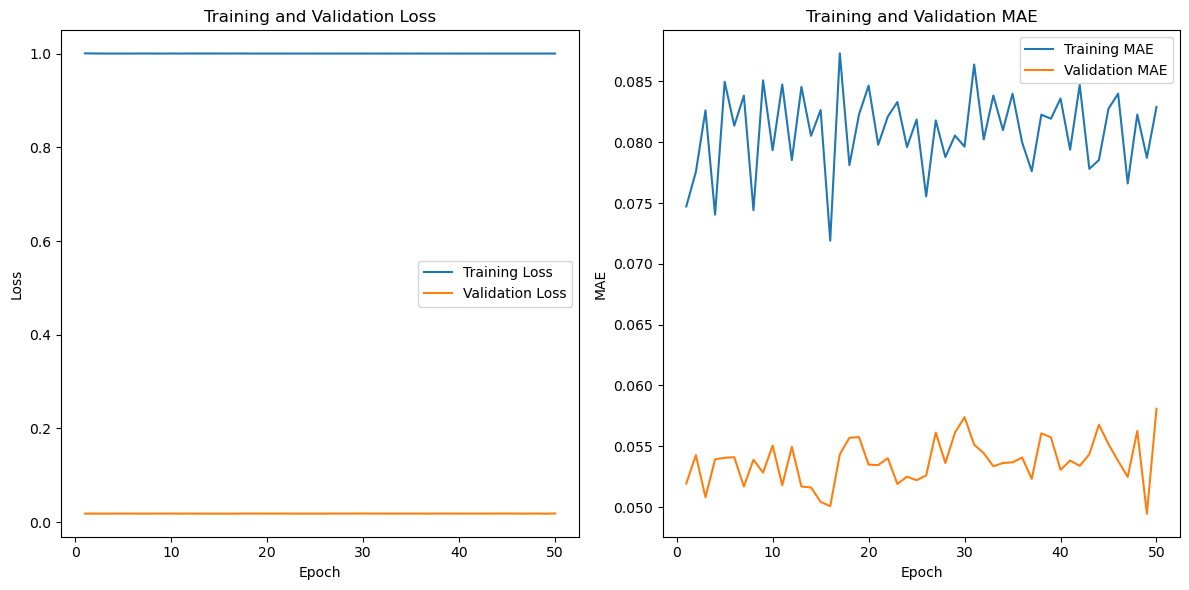

In [20]:
import matplotlib.pyplot as plt

# Visualizamos la pérdida y el MAE durante el entrenamiento
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 6)) # --> Pérdida en el conjunto de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2) # --> MAE en el conjunto de entrenamiento y validación
plt.plot(epochs, history.history['mae'], label='Training MAE')
plt.plot(epochs, history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


- la pérdida en el conjunto de prueba ('va_loss') tiene un comportamiento hacia la baja o que disminuye en la gran mayoria de epocas o EPOCHS, lo cual es positivo.
- El MAE es el conjunto de prueba ('val_mae') también disminuye, lo cual nos indica que las predicciones del modelo estan mejorando en terminos de la precisión.

32/32 [==============================] - 0s 2ms/step


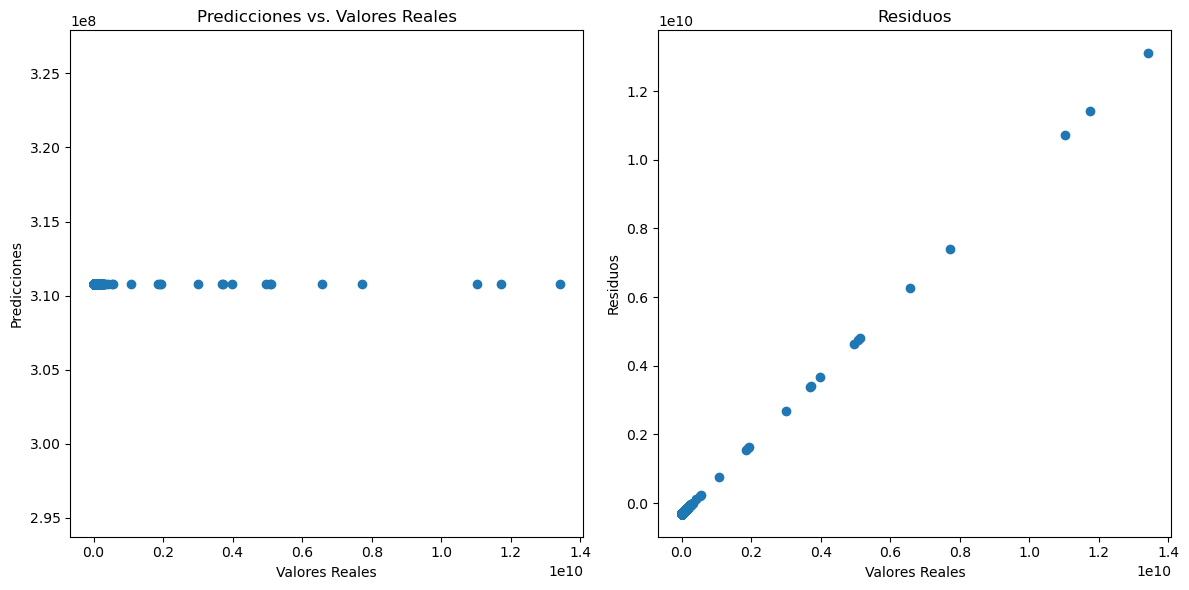

In [22]:
# Obtener predicciones en el conjunto de prueba
y_pred_scaled = model.predict(X_test_scaled)

# Deshacemos la normalización en las predicciones y en los datos reales
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_y.inverse_transform(y_test_scaled)

# Calculamos los  residuos
residuos = y_test_unscaled.flatten() - y_pred.flatten()

# Visualizamos las predicciones vs. valores reales
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_unscaled, y_pred)
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Visualizamos los residuos
plt.subplot(1, 2, 2)
plt.scatter(y_test_unscaled, residuos)
plt.title('Residuos')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()



In [23]:
# Establecer un umbral para identificar anomalías (por ejemplo, 3 desviaciones estándar)
umbral_anomalia = 3

anomalias_indices = np.where(np.abs(residuos) > umbral_anomalia)[0] # --> Identificar filas con residuos significativos

anomalias = data.iloc[y_test.index[anomalias_indices]] # --> Mostrar las filas con anomalías


print("Filas con anomalías:")
print(anomalias)


Filas con anomalías:
      IDNOREMP  IDENT  CORRELA  IDOJ  ESCAPER  PYMES  PRIORIDAD  ESTADO  \
4871      7842    NaN      464    14        3      2          1       5   
1025      1547    NaN      466     4        3      2          1       4   
3192      2492    NaN      451    14        4      3          1       4   
2894      1898    NaN      464     7        3      2          1       5   
4392     22569    NaN     4742    14        1      1          2       5   
...        ...    ...      ...   ...      ...    ...        ...     ...   
88      901166    NaN      464    14        2      2          1       5   
457       4689    NaN      462    11        1      1          1       8   
2418    242167    NaN      466    14        5      3          1       8   
2943      2032    NaN      453    14        4      3          1       4   
3288    239587    NaN      466    14        4      3          1       5   

      NOVEDAD  ESCAPRO  ...  IDAIO  \
4871       99      NaN  ...   2012   
10

In [24]:
# Calcular el rango intercuartílico (IQR) de los residuos
Q1 = np.percentile(residuos, 25)
Q3 = np.percentile(residuos, 75)
IQR = Q3 - Q1

# Establecer el factor multiplicativo (puedes ajustar este valor según sea necesario)
factor_tukey = 1.5

# Calcular los límites para identificar anomalías
limite_inferior = Q1 - factor_tukey * IQR
limite_superior = Q3 + factor_tukey * IQR

anomalias_indices_tukey = np.where((residuos < limite_inferior) | (residuos > limite_superior))[0] # --> Identificar filas con residuos fuera de los límites

anomalias_tukey = data.iloc[y_test.index[anomalias_indices_tukey]] # --> Mostrar las filas con anomalías según la regla de Tukey

print("Filas con anomalías según la regla de Tukey:")
print(anomalias_tukey)


Filas con anomalías según la regla de Tukey:
      IDNOREMP  IDENT  CORRELA  IDOJ  ESCAPER  PYMES  PRIORIDAD  ESTADO  \
4522    234552    NaN      464     5        4      3          1       5   
1391    674032    NaN      462    11        1      1          1       5   
3646    235597    NaN      464    14        6      4          1       4   
4464    231386    NaN      465    14        5      3          1       5   
3268    237905    NaN      453    14        3      2          1       4   
...        ...    ...      ...   ...      ...    ...        ...     ...   
2347    241239    NaN      464    14        5      3          1       6   
3945    238981    NaN      466    14        3      2          1       5   
150     903349    NaN      466     5        5      3          1       4   
3165      2451    NaN      462    12        3      2          1       4   
2418    242167    NaN      466    14        5      3          1       8   

      NOVEDAD  ESCAPRO  ...  IDAIO  \
4522       99   